In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\7LStar\Desktop\study\python\用户分层实战")
df=pd.read_excel('主订单数据集.xlsx')

In [2]:
df.head()

,品牌名,店铺名称,主订单编号,用户ID,付款时间,订单状态,实付金额,购买数量
0,阿粥（小z）,数据不吹牛,73465136654,uid135460366,2023-01-01 09:32:12,交易成功,166,1
1,阿粥（小z）,数据不吹牛,73465136655,uid135460367,2023-01-01 09:11:50,交易成功,117,1
2,阿粥（小z）,数据不吹牛,73465136656,uid135460368,2023-01-01 11:49:02,交易成功,166,1
3,阿粥（小z）,数据不吹牛,73465136657,uid135460369,2023-01-01 12:20:24,交易成功,77,1
4,阿粥（小z）,数据不吹牛,73465136658,uid135460370,2023-01-01 01:23:15,交易成功,158,1


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356233 entries, 0 to 356232
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   品牌名     356233 non-null  object
 1   店铺名称    356233 non-null  object
 2   主订单编号   356233 non-null  int64 
 3   用户ID    356231 non-null  object
 4   付款时间    356233 non-null  object
 5   订单状态    356233 non-null  object
 6   实付金额    356233 non-null  int64 
 7   购买数量    356233 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 21.7+ MB
None
              主订单编号           实付金额           购买数量
count  3.562330e+05  356233.000000  356233.000000
mean   7.346531e+10     166.493065       1.116438
std    1.028358e+05     153.645028       0.817845
min    7.346514e+10      40.000000       1.000000
25%    7.346523e+10      77.000000       1.000000
50%    7.346531e+10     146.000000       1.000000
75%    7.346540e+10     203.000000       1.000000
max    7.346549e+10   29309.000000     150.000000


In [4]:
df=df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356231 entries, 0 to 356232
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   品牌名     356231 non-null  object
 1   店铺名称    356231 non-null  object
 2   主订单编号   356231 non-null  int64 
 3   用户ID    356231 non-null  object
 4   付款时间    356231 non-null  object
 5   订单状态    356231 non-null  object
 6   实付金额    356231 non-null  int64 
 7   购买数量    356231 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 24.5+ MB
None


# 剔除异常值

上限=Q1+n（Q1-Q2）
下限=Q2-n（Q1-Q2）
其中Q1-Q2常叫作四分位距（简称IQR），是度量数据离散程度的有效参数。这里的n可以根据实际情况灵活
设置，n越大，对于异常值越包容。一般认为：当n=1.5时，能够剔除基础的异常值；当n≥3时，剔除的是极
端的异常值。

In [5]:
#异常值处理
up=df.describe()['实付金额']['75%']+(df.describe()['实付金额']['75%']-df.describe()['实付金额']['25%'])*3
low=df.describe()['实付金额']['25%']-(df.describe()['实付金额']['75%']-df.describe()['实付金额']['25%'])*3
print(up)
print(low)

581.0
-301.0


In [6]:
df_cleaned=df[df["实付金额"]<=up]
df_cleaned.describe()

,主订单编号,实付金额,购买数量
count,3.533680e+05,353368.000000,353368.000000
mean,7.346531e+10,160.609150,1.103861
std,1.027865e+05,99.092419,0.645977
min,7.346514e+10,40.000000,1.000000
25%,7.346523e+10,77.000000,1.000000
50%,7.346531e+10,146.000000,1.000000
75%,7.346540e+10,199.000000,1.000000
max,7.346549e+10,581.000000,145.000000


In [7]:
ct_count=df['购买数量'].value_counts().reset_index()
ct_count.columns=["购买数量","订单数量"]
ct_count['订单占比']=ct_count["订单数量"]/ct_count["订单数量"].sum()
ct_count['累计订单占比']=ct_count['订单占比'].cumsum()
ct_count.head(10)

,购买数量,订单数量,订单占比,累计订单占比
0,1,331128,0.929532,0.929532
1,2,14728,0.041344,0.970876
2,3,8326,0.023372,0.994248
3,4,848,0.002380,0.996629
4,5,762,0.002139,0.998768
5,6,200,0.000561,0.999329
6,10,76,0.000213,0.999542
7,7,44,0.000124,0.999666
8,8,23,0.000065,0.999731
9,9,17,0.000048,0.999778


In [8]:
df_cleaned=df_cleaned[df_cleaned["购买数量"]<=5]
df_cleaned.describe()

,主订单编号,实付金额,购买数量
count,3.530890e+05,353089.000000,353089.000000
mean,7.346531e+10,160.557695,1.096488
std,1.027820e+05,99.021395,0.399269
min,7.346514e+10,40.000000,1.000000
25%,7.346523e+10,77.000000,1.000000
50%,7.346531e+10,146.000000,1.000000
75%,7.346540e+10,199.000000,1.000000
max,7.346549e+10,581.000000,5.000000


In [9]:
df_cleaned["订单状态"].value_counts()

交易成功                 289386
付款以前，卖家或买家主动关闭交易      37242
付款以后用户退款成功，交易自动关闭     26447
等待买家确认收货,即:卖家已发货         14
Name: 订单状态, dtype: int64

In [10]:
#这里只关注完成交易的订单
df_cleaned=df_cleaned[df_cleaned['订单状态']=='交易成功']
print('交易成功的订单数量：',len(df_cleaned))

交易成功的订单数量： 289386


# 二八法则用户分层

In [11]:
group_df=df_cleaned.groupby('用户ID')['实付金额'].sum().sort_values(ascending=False).reset_index()
group_df.head()

,用户ID,实付金额
0,uid135476531,39758
1,uid135460679,35543
2,uid135467627,30916
3,uid135473980,23619
4,uid135465649,21015


In [12]:
#取前4%和20%
top_4=round(len(group_df)*0.04)
top_20=round(len(group_df)*0.20)
print("前4%最后一个序号:",top_4)
print("前20%最后一个序号:",top_20)

前4%最后一个序号: 5420
前20%最后一个序号: 27101


In [13]:
print("前4%金额门槛:",group_df.iloc[top_4+1,1])
print("前4%金额门槛:",group_df.iloc[top_20+1,1])

前4%金额门槛: 1037
前4%金额门槛: 460


In [14]:
def judge(x):
    if x>=1037:
        return '高级用户'
    elif x>=460:
        return '中级用户'
    else :
        return '普通用户'

group_df['用户等级']=group_df['实付金额'].apply(judge)
group_df.head()

,用户ID,实付金额,用户等级
0,uid135476531,39758,高级用户
1,uid135460679,35543,高级用户
2,uid135467627,30916,高级用户
3,uid135473980,23619,高级用户
4,uid135465649,21015,高级用户


In [15]:
#查看各个等级金额占比
df_rank=group_df.groupby('用户等级')['实付金额'].sum().sort_values().reset_index()
df_rank['实付金额占比']=df_rank['实付金额']/df_rank['实付金额'].sum()
df_rank.head()

,用户等级,实付金额,实付金额占比
0,高级用户,9087072,0.199717
1,中级用户,14104956,0.310000
2,普通用户,22307802,0.490283


# 拐点法

拐点法的核心在于两个指标的选择。<br />
❑第一个指标：衡量用户的某个行为，例如7天内关注了20个以上的用户；用户累计消费超过300元。这个
指标必须是品牌有能力去影响的指标，否则就算找到拐点，品牌无能为力，也于事无补。<br />
❑第二个指标：指的是品牌希望提升什么指标，如次月留存率、用户生命周期价值。这个指标通常是品牌
希望实现的关键目标，带有一定的预期性。

In [16]:
group_kneed=group_df.iloc[:,:2]
group_kneed.head()

,用户ID,实付金额
0,uid135476531,39758
1,uid135460679,35543
2,uid135467627,30916
3,uid135473980,23619
4,uid135465649,21015


In [24]:
#区间划分
bins=list(range(0,1600,100))+[100000]

ranges=[]

for start, end in zip(range(0,1500,100),range(100,1600,100)):
    interval=str(start)+'-'+str(end)
    ranges.append(interval)
ranges.append('1500+')

print("分组区间:",bins)
print("区间标签:",ranges)

分组区间: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 100000]
区间标签: ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500+']


In [25]:
group_kneed['消费区间']=pd.cut(group_kneed["实付金额"],right=True,bins=bins,labels=ranges)
group_kneed

,用户ID,实付金额,消费区间
0,uid135476531,39758,1500+
1,uid135460679,35543,1500+
2,uid135467627,30916,1500+
3,uid135473980,23619,1500+
4,uid135465649,21015,1500+
...,...,...,...
135499,uid135551937,40,0-100
135500,uid135583969,40,0-100
135501,uid135493631,40,0-100
135502,uid135486524,40,0-100


In [26]:
repur=pd.read_excel('2024年1-3月复购用户.xlsx')
repur.head()

,用户ID
0,uid135477653
1,uid135521126
2,uid135542845
3,uid135531153
4,uid135518141


In [27]:
group_kneed['是否复购']=group_kneed['用户ID'].isin(repur['用户ID'])
group_kneed.head()

,用户ID,实付金额,消费区间,是否复购
0,uid135476531,39758,1500+,True
1,uid135460679,35543,1500+,True
2,uid135467627,30916,1500+,False
3,uid135473980,23619,1500+,False
4,uid135465649,21015,1500+,False


In [34]:
#计算区间的用户数
group_kneed_inter=group_kneed.groupby('消费区间')['用户ID'].count().reset_index()
group_kneed_inter.columns=['消费区间',"用户数"]
group_kneed_inter.head()

,消费区间,用户数
0,0-100,21033
1,100-200,40013
2,200-300,23074
3,300-400,17995
4,400-500,10036


In [38]:
#计算各个区间复购率
group_kneed_repur=group_kneed.groupby('消费区间')['是否复购'].sum().reset_index()
group_kneed_repur.columns=['消费区间',"复购人数"]
group_kneed_repur.head()

,消费区间,复购人数
0,0-100,1535
1,100-200,5162
2,200-300,3900
3,300-400,3545
4,400-500,2017


In [40]:
group_kneed_result=pd.merge(group_kneed_inter,group_kneed_repur,left_on='消费区间',right_on='消费区间',how='inner')
group_kneed_result['复购率']=group_kneed_result['复购人数']/group_kneed_result['用户数']
group_kneed_result.head()

,消费区间,用户数,复购人数,复购率
0,0-100,21033,1535,0.072981
1,100-200,40013,5162,0.129008
2,200-300,23074,3900,0.169021
3,300-400,17995,3545,0.196999
4,400-500,10036,2017,0.200976


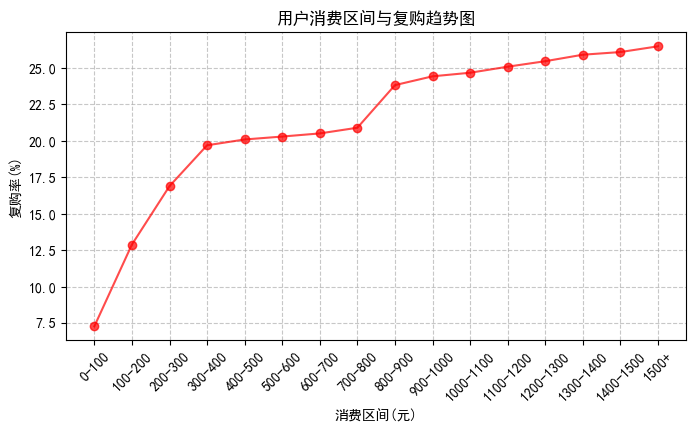

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'#显示中文

fig=plt.figure(figsize=(8,4))
plt.plot(group_kneed_result['消费区间'],group_kneed_result['复购率']*100, marker='o',color='r',alpha=0.7)
plt.title("用户消费区间与复购趋势图")
plt.xlabel("消费区间(元)")
plt.ylabel("复购率(%)")
plt.xticks(rotation=45)
plt.grid(True,linestyle='--',alpha=0.7)

# 结论

❑消费低于400元的用户为低等级用户，品牌应该通过优惠等激励，促进早期用户更多消费以提升其复购
率。<br />
❑消费大于或等于400元且小于900元的用户为中级用户。这部分用户的忠诚度已经有所提升，但应该进一
步促进其消费，让他们与品牌建立更深层的关系。<br />
❑消费大于或等于900元的用户则为高级用户，是品牌最核心和忠诚的用户，无论是新品尝试还是营销活动
传播，他们都是最有动力的一群人，品牌必须足够重视他们并给予关怀奖励。